In [1]:
import numpy as np
import os
import dill as pickle
import matplotlib.pyplot as plt
import pandas as pd
import sys
import hardware_control.wx_programs as wx
import hardware_control.bnc as bnc
from classes.generator import *
from hardware_control.hardware_config import *
from experiment_configuration.values import *
from classes.qubit_class import *
import daq.daq_programs_homo as daq
import seaborn as sns
import standard_sequences.spectroscopy as spec
import analysis.plotting as plotting

In [2]:
q1 = Qubit(q1_dict, readout_dict)
q2 = Qubit(q2_dict, readout_dict)
readout = Readout(readout_dict)
print(f"{q1}\n{q2}")


Qubit(RO_IF=None, qubit_thr=[-10000, -600], ro_amp=0.6, ro_freq=6.72742, RO_LO_pwr=16, ge_ssm=-0.114, ef_ssm=-0.186, IQ_angle=205, ROIF=0.10272000000000059, qubit_id=q1, ge_time=66.625, ef_time=77, ef_amp=1, RO_LO=6.6247, ge_amp=0.5, ro_dur=4000)
Qubit(RO_IF=None, qubit_thr=[-10000, 1900], ro_amp=0.4, ro_freq=6.6556, RO_LO_pwr=16, ge_ssm=-0.186, ef_ssm=-0.224, IQ_angle=85, ROIF=0.030899999999999928, qubit_id=q2, ge_time=40.15374412400174, ef_time=None, ef_amp=1, RO_LO=6.6247, ge_amp=1, ro_dur=4000)


writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 101
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error
0, No error
0, No error
0, No error
Patterns: 101
Records per pattern: 500
Buffers per acquistion: 17
DAQ samples per pattern: 8192
0, No error
Capturing 17 buffers. Press <enter> to abort
Capture completed in 6.496680 sec
Captured 17 buffers (2.616721 buffers per sec)
Captured 52224 records (8038.567955 records per sec)
Transferred 855638016 bytes (131703897.374946 bytes per sec)


<Figure size 800x800 with 0 Axes>

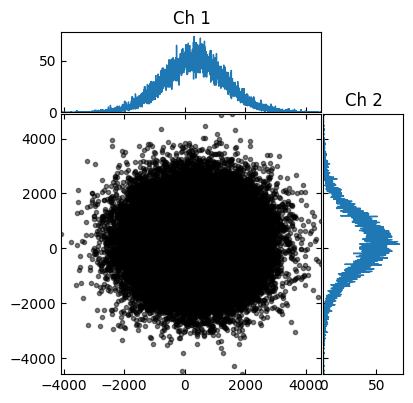

<Figure size 800x800 with 0 Axes>

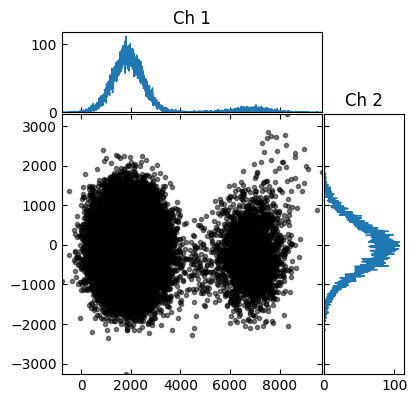

In [9]:
num_steps =101
f1=-.2
f2=-.1

reps = 500
spec.spectroscopy_ge(
    q2,
    q1,
    general_vals_dict,
    ssm_start=f1,
    ssm_stop=f2,
    spec_amp=0.1,
    sweep_time=10000,
    verbose=False,
)
wx.wx_set_and_amplitude_and_offset(amp=general_vals_dict["wx_amps"],
                                    offset=general_vals_dict["wx_offs"])
# Acquire the raw IQ data
values = daq.run_daq_het_2q(q1, q2,
                            num_patterns=num_steps,
                            num_records_per_pattern=reps,
                            verbose=True)

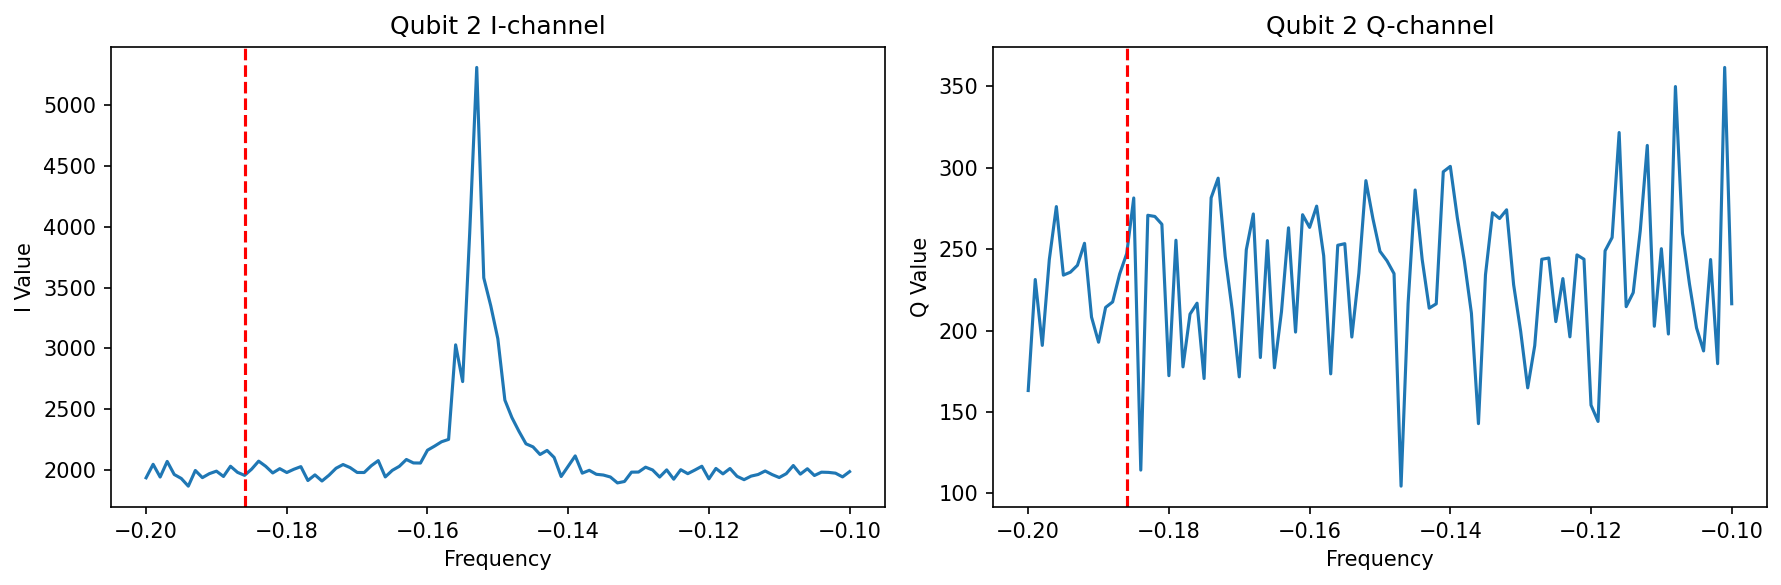

In [10]:
freq_list = np.linspace(f1, f2, num_steps)
plotting.spectroscopy_plot(freq_list, values, [q2.ge_ssm,q2.ge_ssm], qubit_num=2)

In [5]:
dat = plotting.get_IQ_averages(values)
print(freq_list[np.argmin(dat['I1'])])

-0.128
